# Predictions of Used Macbook Price

## Library

In [12]:
from IPython.display import display, Image
import pandas as pd
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np

## import the data

In [23]:
macbook = pd.read_csv('~/aiffel/bike_regression/data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


## Check the data
### correlation between the used years and the price

**Pearson Correlation Coefficient**

![Pearson Correlataion Coefficient](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

- +1: total positive linear correlation
- 0: no linear correlation
- -1: total negative linear correlation

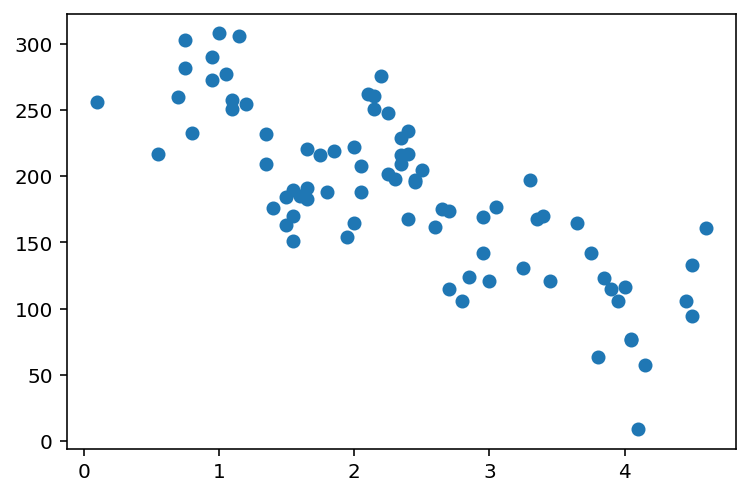

In [11]:
# It shows negative linear correlation
plt.scatter(macbook['used_years'],macbook['price'])
plt.show()

In [14]:
# the value shows that it has quite strong negative correlation
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

## Regression Model

In [24]:
x=macbook["used_years"].values
# target
y=macbook["price"].values

In [27]:
def model(x,w,b):
    y = w*x+b
    return y

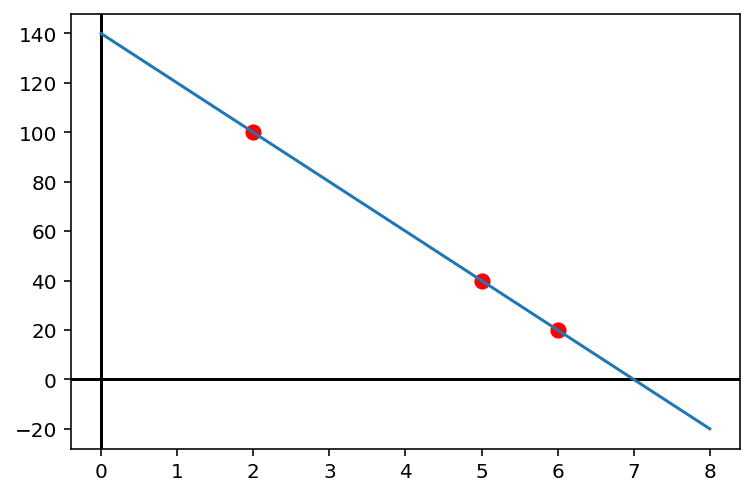

In [28]:
# x축, y축 그리기
plt.axvline(x=0,c='black')
plt.axhline(y=0,c='black')

# y=wx+b 일차함수 그리기
x = np.linspace(0,8,9)
y = model(x,w=-20,b=140) # y = -20x + 140
plt.plot(y)

# 원하는 값 넣어보기
x_data = [2, 5, 6]
y_data = [100., 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

### Finding the best parameter(w, b)/Optimum Function
1. 모델이 출력하는 값 - 실제 정답차 계산
2. 1번에서 구한 차이를 줄여나가기

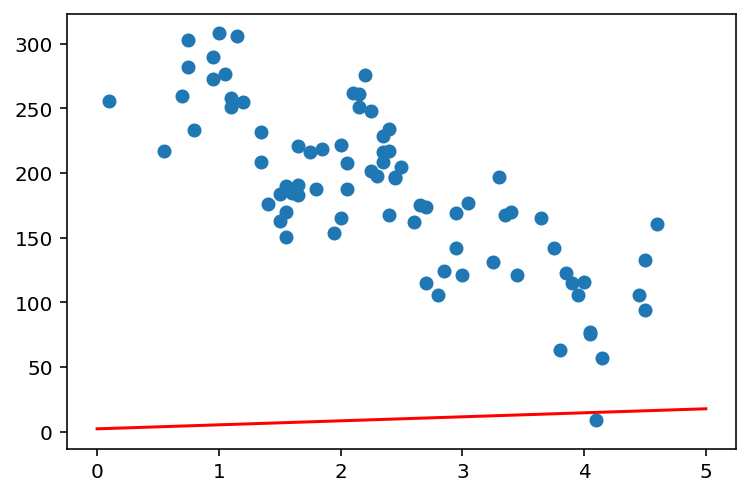

In [29]:
# y = 3.1x + 2.3
w = 3.1
b = 2.3

x = np.linspace(0,5,6)
y = model(x,w,b)
plt.plot(y,c='r')
# It shows that the parameter does not fit well
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [31]:
x = macbook['used_years'].values
# prediction
prediction = model(x,w,b)
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [34]:
# It shows the huge differences between the price and predcted price
macbook['prediction']=prediction
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


#### Loss Function
- Evaluation of Regression Model Accuracy

MAE(Mean Absolute Error) = $ {\frac{1}{N}}\sum_{i=1}^N |y_i - \hat{y}| $   
MSE(Mean Squared Error) = $ {\frac{1}{N}}\sum_{i=1}^N (y_i - \hat{y})^2 $   
RMSE(Root Mean Squared Error) = $\sqrt{MSE} = \sqrt{{\frac{1}{N}}\sum_{i=1}^N (y_i - \hat{y})^2} $   
R-squared (Coefficient of Determination) = $ 1 - \frac{\sum (y_i - \hat{y})^2}{\sum (y_i - \bar{y})^2} $   
$ \hat{y} $ - predicted value of y   
$ \bar{y} $ - mean value of y

In [33]:
# error
macbook['error']=macbook['price']-macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [36]:
def RMSE(a,b):
    mse = ((a-b)**2).mean()
    rmse = mse**0.5
    return rmse

In [37]:
x=macbook['used_years'].values
y=macbook['price'].values

predictions=model(x,w,b)
# shows huge RMSE
rmse = RMSE(predictions,y)
rmse

188.81322969819274

In [50]:
# defining loss function
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

#### Gradient Descent

- w값에 따른 loss function (optimum b찾았다고 가정)   
- random으로 initial weight를 찍었다고 했을 때는 loss가 큼.   
- initial weight를 loss가 낮아지는 방향으로 옮겨야 함.  
- 그림에서 gradient는 +값. 왼쪽으로 갈수록 loss 적어지고 gradient를 통해 어느 방향으로 가고 있는지를 확인할 수 있음.
- 아래 수식에서 alpha는 학습률을 의미(얼마나 업데이트 할지)   
<br>

![gradient descent](https://camo.githubusercontent.com/f0e669b5bd8f2adf73eea18e78ddf86366f22861/68747470733a2f2f692e7974696d672e636f6d2f76692f623456796d61397750486f2f6d617872657364656661756c742e6a7067)

In [48]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

1. input x, output y
2. w,b 랜덤으로 지정
3. prediction을 확인하고, y값과 비교해서 loss 계산
4. 해당 지점에서의 기울기, gradient 계산
5. gradient 사용해서 w = w - a*gradient, b = b - a*gradient 업데이트
6. 3 ~ 5번 반복

In [51]:
LEARNING_RATE = 1 # 보통 0.0001 ~ 0.01정도의 값 사용

# 1번 input x, output y
x = macbook["used_years"].values
y = macbook["price"].values

# 2번 w,b 랜덤 지정
w = 3.1
b = 2.3

# loss 계산
losses = []

# 3 ~ 5 반복
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


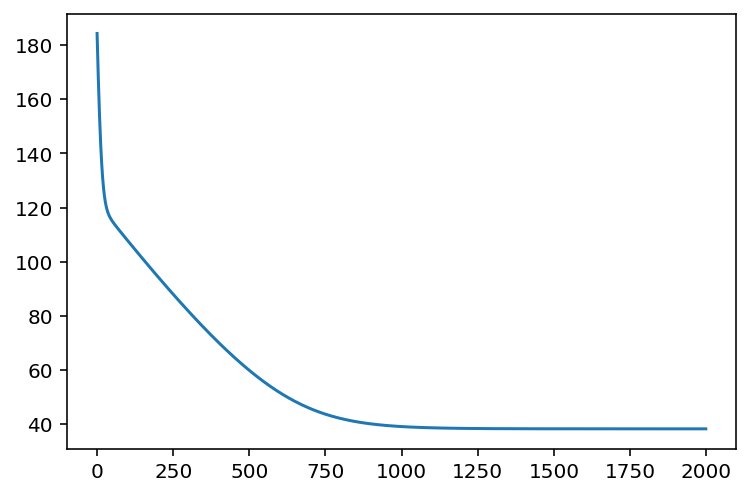

In [52]:
plt.plot(losses)
plt.show()

In [54]:
w,b

(-44.92756090768412, 293.0815786721102)

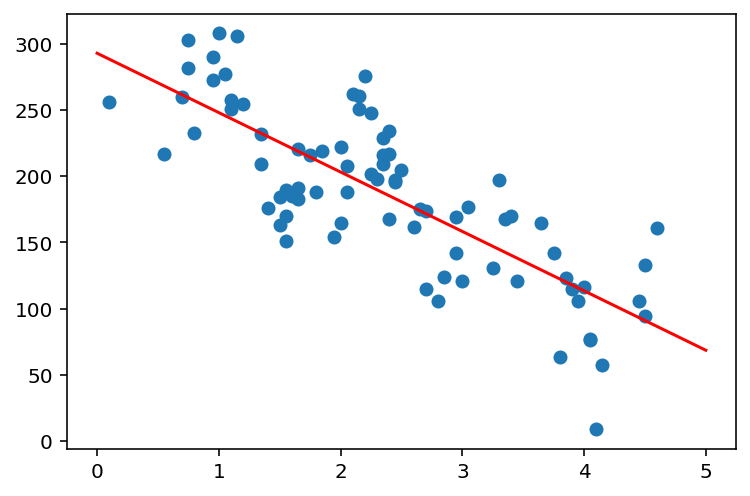

In [55]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

## Test 하기

In [56]:
# test data
test = pd.read_csv("~/aiffel/bike_regression/data/macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [57]:
test_x = test['used_years'].values
test_y = test['price'].values

In [58]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [59]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


In [60]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

45.03918284717212

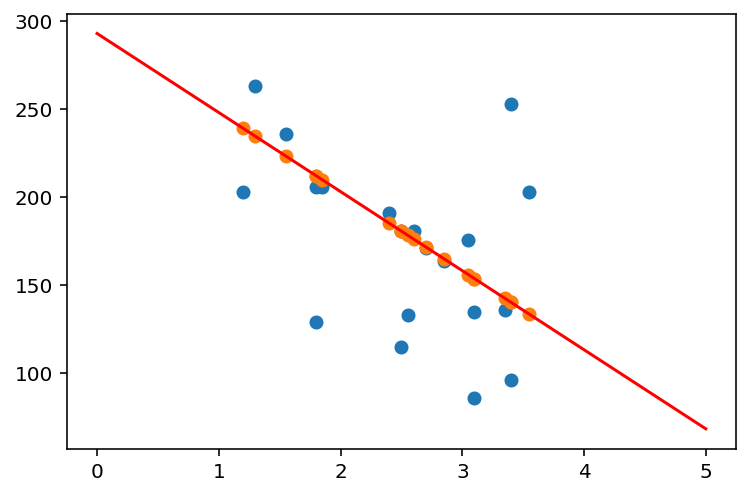

In [61]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()